In [1]:
import pandas as pd
import numpy as np
from numpy import diff

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl

# import geopandas as gpd
import math

from matplotlib.patches import Circle, Wedge, Polygon

import os
import matplotlib.patheffects as path_effects


from netCDF4 import Dataset as NetCDFFile 

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from datetime import datetime, timezone

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

In [2]:
data = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')
data = data[(data['MW'] >= 5.1)]
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [3]:
# slab
slab_length = pd.read_csv("/Users/mohd0001/PhD_Monash/Paper2/time-series/data/depth_at_prof_50.csv", sep = ',', header = 'infer')
slab_length=slab_length.append(slab_length, ignore_index=True)
slab_length = slab_length[(slab_length['LAT'] <= 15) & (slab_length['LON'] <= 120)]
slab_length = slab_length.sort_values(by = 'ALONG',ascending=True)
length = np.asarray(slab_length['LENGTH'])

In [4]:
# data_100 = data[(data['P(km)'] > 100) & (data['P(km)'] < 700)] # 100 km towards landwards (130, 180, )
data_UP = data.loc[data['CLASS'] == 'UPPER']
# data_UP = data_UP[(data['DEPTH'] < 0)]

data_slab = data[(data['P(km)'] > 0) &
                 (data['DEPTH'] > 0) & (data['DEPTH'] < 70) &
                 (data['MW'] >= 5.1) &
                (data['LAT'] <= 15) & (data['LON'] <= 120)] # only in the subducting slab at < 300 km
data_DW = data_slab.loc[data['CLASS'] == 'DGOING']
# data_DW = data_DW[(data_DW['MW'] >= 5.1)]

data_MT = data.loc[data['CLASS'] == 'MTHRUST']
# data_MT = data_MT[(data_MT['MW'] >= 5.1)]
data_MT = data_MT[(data_MT['LAT'] >= -6) & (data_MT['LAT'] <= 6)]

In [5]:
# print(data_MT[['MW', 'ALONG', 'DATE', 'YEARS']])

In [6]:
data_T_DW = data_DW.loc[data_DW['TYPE'] == 'THRUST']
data_SS_DW = data_DW.loc[data_DW['TYPE'] == 'SS']
data_N_DW = data_DW.loc[data_DW['TYPE'] == 'NORM']

In [7]:
# data_inter_DW = data_DW[(data_DW['DEPTH'] > 70) & (data_DW['DEPTH'] < 250)]
# data_deep_DW = data_DW[(data_DW['DEPTH'] >= 250)]

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


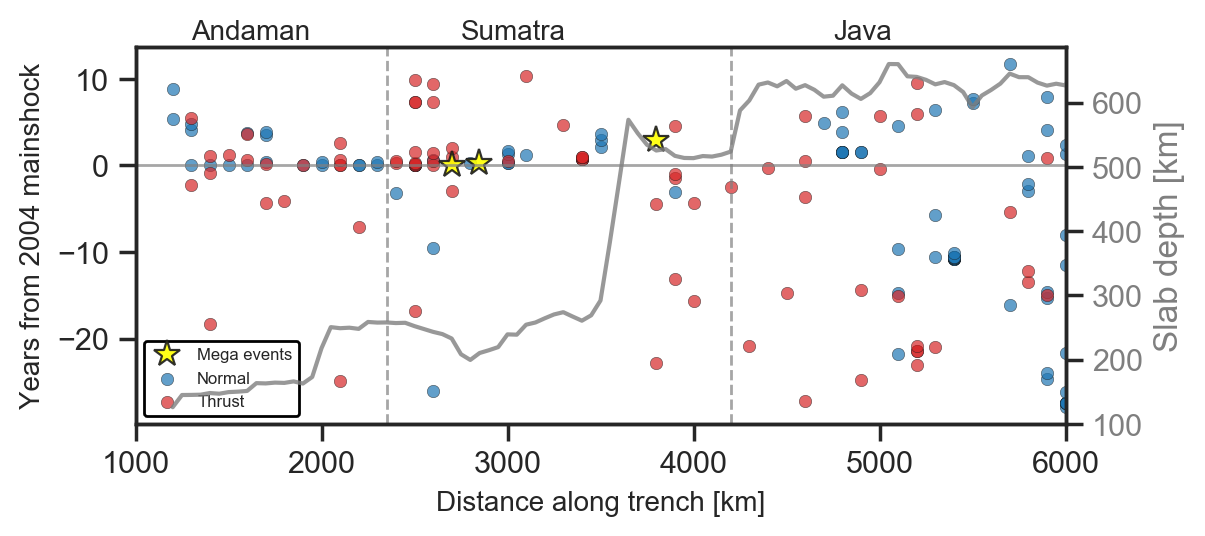

In [8]:
figsize = (6,2.5)

fig, ax1 = plt.subplots(dpi = 200, figsize=figsize)


ax1.set_xlabel('Distance along trench [km]', fontsize=10)
ax1.set_ylabel('Years from 2004 mainshock', fontsize=10)  # we already handled the x-label with ax1
# plot = ax1.bar(data_along_pos, data_along_energy, color = color, linewidth = 0.5, edgecolor = 'k', width = width, alpha = 0.5, label= 'Seismic Moment Release')


lw=8
alpha=0.3
# ax1.axhline(y=-20.2, color='orange', lw=lw, ls='-', alpha=alpha)
# ax1.axhline(y=-12.8, color='maroon', lw=lw, ls='-', alpha=alpha)
# ax1.axhline(y=-10, color='tab:purple', lw=lw, ls='-', alpha=alpha)
# ax1.axhline(y=-7, color='cyan', lw=lw, ls='-', alpha=alpha)
# ax1.axhline(y=-3.4, color='red', lw=lw, ls='-', alpha=alpha)
# ax1.axhline(y=0, color='yellow', lw=lw, ls='-', alpha=0.7)
# ax1.axhline(y=2.8, color='grey', lw=lw, ls='-', alpha=0.4)


size=20
linewidth = 0.2
plot = ax1.scatter(data_N_DW['ALONG'], data_N_DW['YEARS'],
                   color = 'tab:blue', linewidth = linewidth, alpha = 0.7, s=size,
                   edgecolor = 'k', label='Normal')

plot = ax1.scatter(data_T_DW['ALONG'], data_T_DW['YEARS'],
                   color = 'tab:red', linewidth = linewidth, alpha = 0.7, s=size,
                  edgecolor = 'k', label='Thrust')
# plot = ax1.scatter(data_SS_DW['ALONG'], data_SS_DW['YEARS'],
#                    color = 'tab:orange', linewidth = 0.5, alpha = 0.7, s=size,
#                   edgecolor = 'k', label='Strike-slip')

# plot = ax1.scatter(data_inter_DW['ALONG'], data_inter_DW['YEARS'],
#                    color = 'skyblue', linewidth = 0.5, alpha = 0.7, s=size,
#                    edgecolor = 'k', label='70-250 km')

# plot = ax1.scatter(data_deep_DW['ALONG'], data_deep_DW['YEARS'],
#                    color = 'coral', linewidth = 0.5, alpha = 0.7, s=size,
#                   edgecolor = 'k', label='> 250 km')

plot = ax1.plot(2700, 0, "*",
                markersize = 10,
                linewidth=2,
                color = 'k',
                alpha=0.9,
                
         mfc = 'yellow', mew = 0.8, lw = 0.8)

plot = ax1.plot(2845, 0.252502, "*",
                markersize = 10,
                linewidth=2,
                color = 'k',
                alpha=0.9,
               
         mfc = 'yellow', mew = 0.8, lw = 0.8)

plot = ax1.plot(3800, 2.953983, "*",
                markersize = 10,
                linewidth=2,
                color = 'k',
                alpha=0.9,
                label = 'Mega events',
         mfc = 'yellow', mew = 0.8, lw = 0.8)


# ax1.set_ylim([-28, 10])
ax1.set_xlim([1000, 6000])


ax1.axvline(x= 2350, color="gray", lw=1, ls='--', alpha=0.7)
ax1.axvline(x= 4200, color="gray", lw=1, ls='--', alpha=0.7)

ax1.axhline(y= 0, color="gray", lw=1, ls='-', alpha=0.7)
# ax1.axhline(y= 2.953983, color="gray", lw=1, ls='-', alpha=0.7)

ax1.legend(loc = 'lower left',
            fontsize = 6,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)


x0, xmax = ax1.set_xlim()
y0, ymax = ax1.set_ylim()
data_width = xmax - x0
data_height = ymax - y0
ax1.text(x0 + data_width*0.06, y0 + data_height * 1.02, 'Andaman', fontsize=10)
ax1.text(x0 + data_width*0.35, y0 + data_height * 1.02, 'Sumatra', fontsize=10)
ax1.text(x0 + data_width*0.75, y0 + data_height * 1.02, 'Java', fontsize=10)


color = 'tab:gray'
# ax1.tick_params(axis='y', labelcolor=color)

# ax1.set_yscale('log')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Slab depth [km]', color=color)
ax2.plot(slab_length['ALONG'], slab_length['LENGTH']*-1, '-', color=color, alpha = 0.8, markersize = 3, linewidth = 1.5, label= 'Slab')
ax2.tick_params(axis='y', labelcolor=color)


# plt.tight_layout()

plt.savefig("/Users/mohd0001/PhD_Monash/Paper2/output/alongtrench_years_shallow.png"
            , dpi = 500, transparent= True, bbox_inches='tight')

In [9]:
# #Plot the cumulative seismic moment released along the trench
# data_df = data_MT.sort_values(by = 'YEARS',ascending=True)
# data_along_pos = pd.unique(data_df['YEARS'])
# data_along_energy = []

# grp = data_df.groupby('YEARS')

# for pos in data_along_pos:
#     to_proc = grp.get_group(pos) 
#     exp = np.asarray(to_proc['EX'])
#     mo = np.asarray(to_proc['MO'])
#     energy = mo*np.power(10., exp)
#     data_along_energy.append(np.sum(energy))
    
# data_along_energy = np.asarray(data_along_energy)


# figsize = (6,2.5)

# fig, ax1 = plt.subplots(dpi = 200, figsize=figsize)


# ax1.set_xlabel('Years from the 2004 mainshock', fontsize=10)
# ax1.set_ylabel('Energy', fontsize=10)  # we already handled the x-label with ax1
# ax1.set_yscale('log')

# plot = ax1.bar(data_along_pos, data_along_energy, width=0.05,
#                    color = 'tab:red', linewidth = 0.1, alpha = 0.5,
#                    edgecolor = 'k')
# plot = ax1.plot(data_along_pos, data_along_energy, 'o',
#          markersize = 2, color = 'tab:red', markerfacecolor = 'white')

In [10]:
# #Plot the cumulative seismic moment released along the trench
# data_df = data_DW.sort_values(by = 'YEARS',ascending=True)
# data_along_pos = pd.unique(data_df['YEARS'])
# data_along_energy = []

# grp = data_df.groupby('YEARS')

# for pos in data_along_pos:
#     to_proc = grp.get_group(pos) 
#     exp = np.asarray(to_proc['EX'])
#     mo = np.asarray(to_proc['MO'])
#     energy = mo*np.power(10., exp)
#     data_along_energy.append(np.sum(energy))
    
# data_along_energy = np.asarray(data_along_energy)


# figsize = (6,2.5)

# fig, ax1 = plt.subplots(dpi = 200, figsize=figsize)


# ax1.set_xlabel('Years from the 2004 mainshock', fontsize=10)
# ax1.set_ylabel('Energy', fontsize=10)  # we already handled the x-label with ax1
# ax1.set_yscale('log')

# plot = ax1.bar(data_along_pos, data_along_energy, width=0.05,
#                    color = 'tab:blue', linewidth = 0.1, alpha = 0.5,
#                    edgecolor = 'k')
# plot = ax1.plot(data_along_pos, data_along_energy, 'o',
#          markersize = 2, color = 'tab:blue', markerfacecolor = 'white')

# # plot = ax1.scatter(data_T_DW['ALONG'], data_T_DW['YEARS'],
# #                    color = 'tab:red', linewidth = 0.5, alpha = 0.7,
# #                   edgecolor = 'k', label='Compression')
# # plot = ax1.scatter(data_SS_DW['ALONG'], data_SS_DW['YEARS'],
# #                    color = 'tab:orange', linewidth = 0.5, alpha = 0.7,
# #                   edgecolor = 'k', label='Compression')